# Mercedes Benz Greener Manufacturing

The Mercedes-Benz Greener Manufacturing competition, hosted on Kaggle, focuses on optimizing the vehicle testing process to improve manufacturing efficiency and environmental sustainability. Participants are tasked with developing machine learning models to predict the time a car spends on the test bench based on its features. The goal is to minimize testing durations, thereby reducing energy consumption and CO2 emissions in the production process. This initiative aligns with Mercedes-Benz’s commitment to greener manufacturing practices by promoting innovative solutions that enhance both operational efficiency and environmental responsibility.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip


In [2]:
import zipfile
paths=["/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip","/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip","/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip"]
names=["sample_submission.csv","test.csv","train.csv"]
for p, n in zip(paths,names):
    with zipfile.ZipFile(p, 'r') as zip_ref:
        zip_ref.extractall(n)

In [3]:
ss=pd.read_csv("/kaggle/working/sample_submission.csv/sample_submission.csv")
test=pd.read_csv("/kaggle/working/test.csv/test.csv")
train=pd.read_csv("/kaggle/working/train.csv/train.csv")

In [4]:
ss.head()

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318


In [5]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

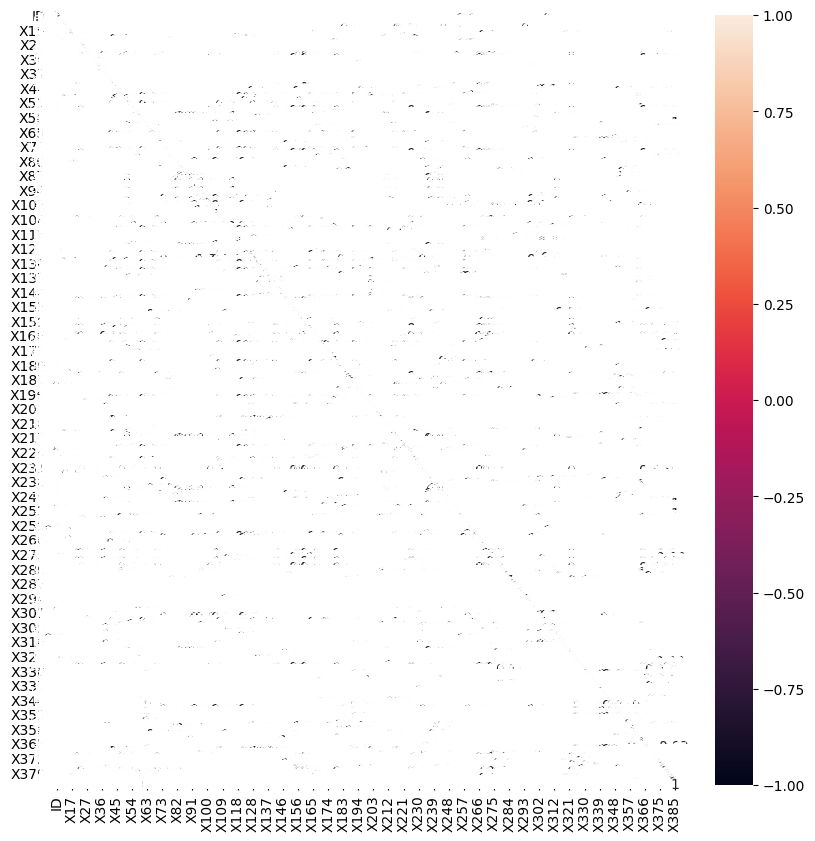

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(numeric_only=True),annot=True)
plt.show()

In [9]:
abs(train.corr(numeric_only=True)["y"]).sort_values(ascending=False)[0:15]

y       1.000000
X314    0.606005
X261    0.588785
X127    0.510620
X232    0.379629
X279    0.379629
X263    0.379629
X29     0.379629
X54     0.368177
X76     0.368177
X136    0.368177
X328    0.366220
X276    0.359254
X162    0.355876
X272    0.350868
Name: y, dtype: float64

In [10]:
columns_to_keep = [
    "X314", "X261", "X127", "X232", "X279", "X263", "X29", "X54", "X76",
    "X136", "X328", "X276", "X162", "X272","y"
]
train=train[columns_to_keep]

In [11]:
import plotly.express as px

In [12]:
px.scatter(train,x="X314",y="y",size="y", trendline="ols")

In [14]:
px.scatter(train,x="X272",y="y",size="y", trendline="ols")

In [15]:
train.head()

,X314,X261,X127,X232,X279,X263,X29,X54,X76,X136,X328,X276,X162,X272,y
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,130.81
1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,88.53
2,0,0,0,1,1,0,1,1,1,0,1,1,1,1,76.26
3,0,0,0,1,1,0,1,1,1,0,1,1,1,1,80.62
4,0,0,0,1,1,0,1,1,1,0,1,1,1,1,78.02


In [16]:
x=train.drop("y",axis=1)
y=train["y"]

In [17]:
train.shape

(4209, 15)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

2024-06-16 07:04:19.496044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 07:04:19.496124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 07:04:19.497878: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
model = Sequential()
model.add(Dense(96, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["r2_score"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9148.5381 - r2_score: -51.4274 - val_loss: 184.2202 - val_r2_score: -0.2175
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.7742 - r2_score: 0.0448 - val_loss: 113.5602 - val_r2_score: 0.2495
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.0599 - r2_score: 0.2134 - val_loss: 112.3244 - val_r2_score: 0.2576
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.1116 - r2_score: 0.2916 - val_loss: 99.8483 - val_r2_score: 0.3401
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.5920 - r2_score: 0.3322 - val_loss: 92.2797 - val_r2_score: 0.3901
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.0717 - r2_score: 0.3768 - val_loss: 88.2024 - val_r2_score: 0.4171
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.5568 - r2_score: 0.4271 - val_loss: 81.5206 - val_r2_score: 0.4612
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.6406 

In [22]:
model.save("model.h5")

In [24]:
test=test[[
    "X314", "X261", "X127", "X232", "X279", "X263", "X29", "X54", "X76",
    "X136", "X328", "X276", "X162", "X272"
]]
y_pred = model.predict(test)
y_pred

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 76.48118 ],
       [ 95.53911 ],
       [ 75.01464 ],
       ...,
       [ 95.53911 ],
       [110.460526],
       [ 95.53911 ]], dtype=float32)

In [25]:
ss["y"]=y_pred
ss.to_csv("submission.csv",index=False)